# 3b. Calculate <i>f</i><sub>O<sub>2</sub></sub> from melt S<sub>T</sub> for analyses from a csv file using default options

This time, instead of creating a dataframe in a cell for the analysis, we'll read it in from a spreadsheet. 

## Python set-up
You need to install VolFe once on your machine, if you haven't yet. Then we need to import a few Python packages (including VolFe)

In [1]:
# Install VolFe on your machine. Don't remove the # from this line!
# pip install VolFe # Remove the first # in this line if you have not installed VolFe on your machine before.

# import python packages
import pandas as pd
import matplotlib.pyplot as plt
import VolFe as vf

## Import data

We'll use the examples_marianas_wT csv in files and use all the default options again and we'll do the calculation at <i>P<sup>v</sup></i><sub>sat</sub> (i.e., we don't know the pressure). 

The data in this file are from Brounce et al. (2014) and Kelley & Cottrell (2012).

In [2]:
# Read csv to define melt composition
my_analyses = pd.read_csv("../files/example_marianas_wT.csv") 

## Run the calculation

### Calculate only for the first row

There are a few analyses in the csv. First, we will tell the function to stop after the first analysis by saying last_row=1:

In [3]:
# runs the calculation
vf.calc_melt_S_oxybarometer(my_analyses,last_row=1)

,sample,T ('C),H2OT-eq_wtpc,CO2T-eq_ppmw,ST_ppmw,X_ppmw,P (bar) sulf,S2- SCSS,sulfide saturated?,DFMQ-sulfide,...,KHOSg opt,KOSg opt,KOSg2 opt,KCOg opt,KCOHg opt,KOCSg opt,KCOs opt,carbonylsulfide opt,density opt,Date
0,TN273-01D-01-01,1200,1.88,13,362.83,0,,422.089182,no,,...,Ohmoto97,Ohmoto97,ONeill22,Ohmoto97,Ohmoto97,Moussallam19,Holloway92,COS,DensityX,2024-07-13 18:12:06.185911


### Calculate for all rows

To run all the analyses, simply don't tell it the last row you want to run. 

All analyses must be in consequitive rows for this to work! 

At the end it will show the dataframe of the full results.

In [5]:
# runs the calculation
results = vf.calc_melt_S_oxybarometer(my_analyses)

### Calculate for particular rows

If we only want to run row 4 (Agr07-4) through 18 (AGR19-02-16) in that spreadsheet, we simply specify the first and last rows we want to run (remembering that row 2 in a spreadsheet - i.e., the first analysis under the headings - is actually row 0 in the dataframe).

In [6]:
results2 = vf.calc_melt_S_oxybarometer(my_analyses,first_row=2, last_row=17)

## Plotting

We can plot <i>P<sup>v</sup></i><sub>sat</sub> vs. <i>f</i><sub>O<sub>2</sub></sub> for all the analyses

(4500.0, 0.0)

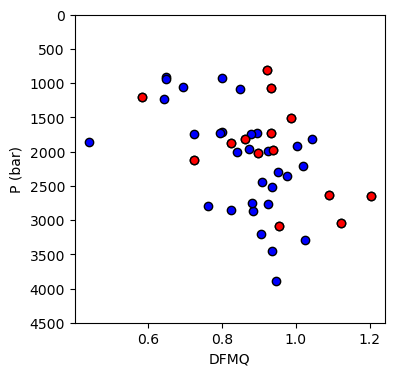

In [22]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,4))

# Plotting data

data1 = results[results['DFMQ-sulfide'] != ""] # all calculations
data2 = results2[results2['DFMQ-sulfide'] != ""] # 4 to 18

ax1.plot(data1['DFMQ-sulfide'],data1['P (bar) sulf'], 'ok', mfc='blue')
ax1.plot(data2['DFMQ-sulfide'],data2['P (bar) sulf'], 'ok', mfc='red')

ax1.set_xlabel('DFMQ')
ax1.set_ylabel('P (bar)')
ax1.set_ylim([4500, 0])